<a href="https://colab.research.google.com/github/zinia94/M606_MachineLearning/blob/main/notebook/heart_diseases_detection_ml_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

# Importing Libraries

In [73]:
import pandas as pd
import sklearn.model_selection as skms
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.compose
import sklearn.svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Business Problem Definition

# Data Collection

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/zinia94/M606_MachineLearning/main/dataset/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Test Train Split

In [13]:
df_train, df_test = skms.train_test_split(df, train_size =0.8, random_state= 42)

print("df size: ", df.shape)
print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)


df size:  (918, 12)
df_train size: (734, 12)
df_test size: (184, 12)


In [14]:
df_train.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

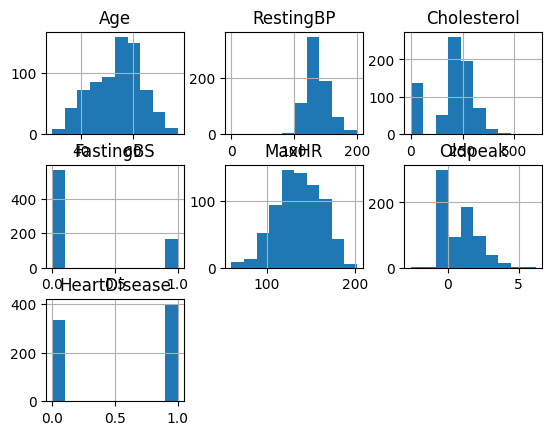

In [18]:
df_train.hist()

<Axes: >

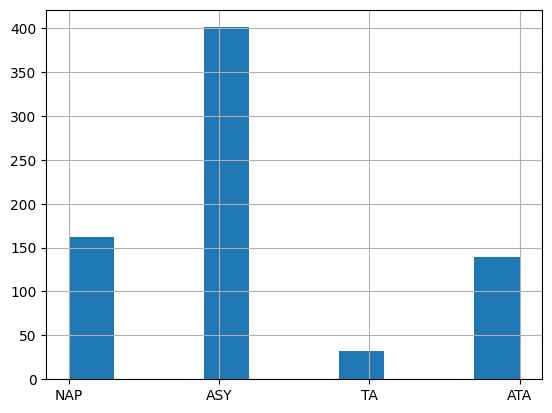

In [21]:
df_train['ChestPainType'].hist()

<Axes: >

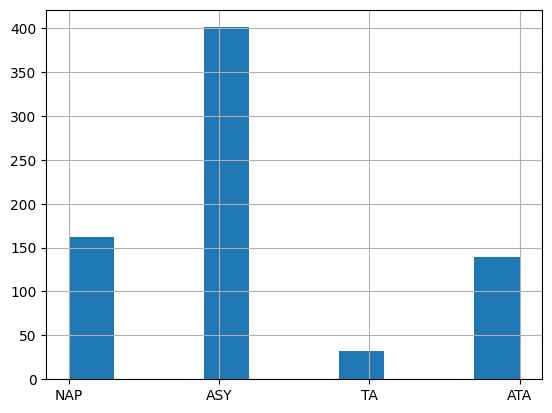

In [22]:
df_train['ChestPainType'].hist()

<Axes: >

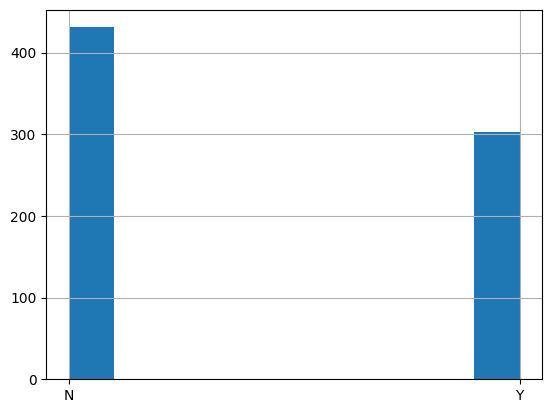

In [27]:
df_train['ExerciseAngina'].hist()

<Axes: >

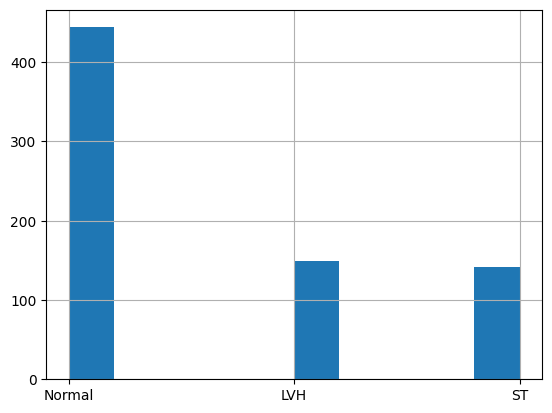

In [24]:
df_train['RestingECG'].hist()

<Axes: >

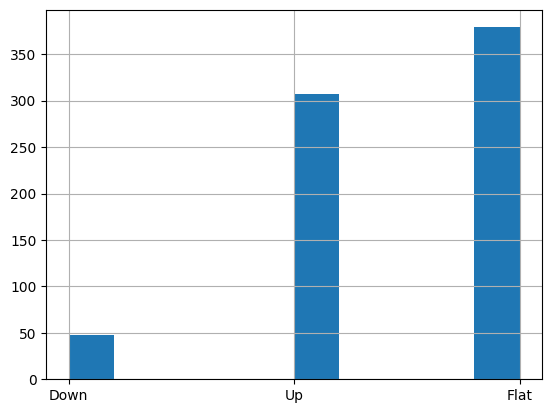

In [26]:
df_train['ST_Slope'].hist()

<Axes: >

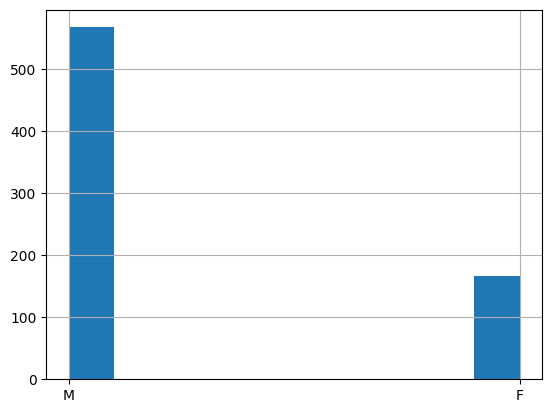

In [28]:
df_train['Sex'].hist()

In [29]:
x_train = df_train.drop(["HeartDisease"], axis= 1)
y_train = df_train["HeartDisease"]
x_test = df_test.drop(["HeartDisease"], axis= 1)
y_test = df_test["HeartDisease"]

print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test size: ", x_test.shape)
print("y_test size: ", y_test.shape)

x_train size:  (734, 11)
y_train size:  (734,)
x_test size:  (184, 11)
y_test size:  (184,)


In [38]:
numerical_attributes = x_train.select_dtypes(include=["int64", "float64"]).columns
categorical_attributes = x_train.select_dtypes(include=["object"]).columns

print("numerical_attributes: ", numerical_attributes)
print("categorical_attributes: ", categorical_attributes)

ct = sklearn.compose.ColumnTransformer([
    ("standard_scaling", sklearn.preprocessing.StandardScaler(), numerical_attributes),
    ("one-hot_encoding", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), categorical_attributes),

])

ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

numerical_attributes:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')
categorical_attributes:  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [46]:
scaler = StandardScaler()
# Fit on the train set only
scaler.fit(x_train)
# Apply to both on train and test set
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [47]:
# Apply PCA
pca = PCA()
# Fit on the train set only
pca.fit(x_train)
# Apply transform to both the train set and the test set.
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [71]:
svm_model = sklearn.svm.SVC()
svm_model.fit(x_train, y_train)
svm_model.score(x_test, y_test)

0.8695652173913043

In [64]:
lr_model = LogisticRegression(random_state = 0).fit(x_train, y_train)
lr_model.score(x_test, y_test)

0.8260869565217391

In [65]:
rf_model = RandomForestClassifier().fit(x_train, y_train)
rf_model.score(x_test, y_test)

0.8586956521739131

In [68]:
gnb_model = GaussianNB().fit(x_train, y_train)
gnb_model.score(x_test, y_test)

0.8532608695652174

In [70]:
knn_model = KNeighborsClassifier().fit(x_train, y_train)
knn_model.score(x_test, y_test)

0.8641304347826086

In [75]:
gbc_model = GradientBoostingClassifier().fit(x_train, y_train)
gbc_model.score(x_test, y_test)

0.8315217391304348